# T81-558: Applications of Deep Neural Networks
**Module 9: Regularization: L1, L2 and Dropout**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 9 Material

* Part 9.1: Introduction to Keras Transfer Learning [[Video]](https://www.youtube.com/watch?v=WLlP6S-Z8Xs&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_09_1_keras_transfer.ipynb)
* Part 9.2: Popular Pretrained Neural Networks for Keras [[Video]](https://www.youtube.com/watch?v=ctVA1_46YEE&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_09_2_popular_transfer.ipynb)
* Part 9.3: Transfer Learning for Computer Vision and Keras [[Video]](https://www.youtube.com/watch?v=61vMUm_XBMI&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_09_3_transfer_cv.ipynb)
* **Part 9.4: Transfer Learning for Languages and Keras** [[Video]](https://www.youtube.com/watch?v=ajmAAg9FxXA&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_09_4_transfer_nlp.ipynb)
* Part 9.5: Transfer Learning for Keras Feature Engineering [[Video]](https://www.youtube.com/watch?v=Dttxsm8zpL8&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_09_5_transfer_feature_eng.ipynb)

# Part 9.4: Transfer Learning for Languages and Keras

Transfer learning is commonly used with Natural Language Processing (NLP).  This course has an entire module that covers NLP.  However, for now we will look how a NLP network can be loaded into Keras for transfer learning.  The following three sources were helpful for the creation of this section.

* Cer, D., Yang, Y., Kong, S. Y., Hua, N., Limtiaco, N., John, R. S., ... & Sung, Y. H. (2018). [Universal sentence encoder](https://arxiv.org/abs/1803.11175). arXiv preprint arXiv:1803.11175.
* [Deep Transfer Learning for Natural Language Processing: Text Classification with Universal Embeddings](https://towardsdatascience.com/deep-transfer-learning-for-natural-language-processing-text-classification-with-universal-1a2c69e5baa9)
* [Keras Tutorial: How to Use Google's Universal Sentence Encoder for Spam Classification](http://hunterheidenreich.com/blog/google-universal-sentence-encoder-in-keras/)

These examples make use of TensorFlow Hub, which allows pretrained models to easily be loaded into TensorFlow.  To install TensorHub use the following command.

In [1]:
!pip install tensorflow_hub

It is also necessary to install TensorFlow Datasets.  This can be done with the following command.

In [2]:
!pip install tensorflow_datasets

https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/tf2_text_classification.ipynb#scrollTo=2ew7HTbPpCJH

Load the Internet Movie DataBase (IMDB) reviews data set.

In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"], 
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

# /Users/jheaton/tensorflow_datasets/imdb_reviews/plain_text/0.1.0

W0819 16:45:54.504038 19696 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


Load a pretrained embedding model called [gnews-swivel-20dim](https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1).  This was trained by Google on gnews data and can convert RAW text into vectors.  

In [4]:
model = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(model, output_shape=[20], input_shape=[], 
                           dtype=tf.string, trainable=True)

Consider the following 3 movie reviews.

In [5]:
train_examples[:3]

array([b"Oh yeah! Jenna Jameson did it again! Yeah Baby! This movie rocks. It was one of the 1st movies i saw of her. And i have to say i feel in love with her, she was great in this move.<br /><br />Her performance was outstanding and what i liked the most was the scenery and the wardrobe it was amazing you can tell that they put a lot into the movie the girls cloth were amazing.<br /><br />I hope this comment helps and u can buy the movie, the storyline is awesome is very unique and i'm sure u are going to like it. Jenna amazed us once more and no wonder the movie won so many awards. Her make-up and wardrobe is very very sexy and the girls on girls scene is amazing. specially the one where she looks like an angel. It's a must see and i hope u share my interests",
       b"This is the most depressing film I have ever seen. I first saw it as a child and even thinking about it now really upsets me. I know it was set in a time when life was hard and I know these people were poor and the 

The embedding layer can convert each to 20-number vectors.

In [6]:
hub_layer(train_examples[:3])

<tf.Tensor: id=311, shape=(3, 20), dtype=float32, numpy=
array([[ 3.4232912 , -4.230874  ,  4.1488533 , -0.29553518, -6.802391  ,
        -2.5163853 , -4.4002395 ,  1.905792  ,  4.7512794 , -0.40538004,
        -4.3401685 ,  1.0361497 ,  0.9744097 ,  0.71507156, -6.2657013 ,
         0.16533905,  4.560262  , -1.3106939 , -3.1121316 , -2.1338716 ],
       [ 3.041689  , -4.7446456 ,  4.733248  ,  0.30785134, -6.9846196 ,
        -5.9006767 , -4.4500394 ,  2.3718796 ,  5.0403566 ,  0.4119934 ,
        -2.8661985 ,  0.6986558 ,  0.5313177 ,  1.4525845 , -7.200312  ,
         2.9011002 ,  6.392641  , -2.6039283 , -2.9440727 , -2.4246173 ],
       [ 3.9819887 , -4.4838037 ,  5.177359  , -2.3643482 , -3.2938678 ,
        -3.5364532 , -2.4786978 ,  2.5525482 ,  6.688532  , -2.3076782 ,
        -1.9807833 ,  1.1315885 , -3.0339816 , -0.7604128 , -5.743445  ,
         3.4242578 ,  4.790099  , -4.03061   , -5.992149  , -1.7297493 ]],
      dtype=float32)>

We add addition layers to attempt to classify the movie reviews as either positive or negative.

In [7]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


Compile the neural network.

In [8]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Split and train the neural network.

In [9]:
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

W0819 16:45:57.484114 19696 training_utils.py:1210] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/40


W0819 16:45:57.599118 19696 deprecation.py:323] From C:\Users\jheaton\AppData\Local\Continuum\miniconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\ops\nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0819 16:45:57.879124 19696 deprecation.py:323] From C:\Users\jheaton\AppData\Local\Continuum\miniconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\keras\optimizer_v2\optimizer_v2.py:455: BaseResourceVariable.constraint (from tensorflow.python.ops.resource_variable_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Apply a constraint manually following the optimizer update step.


15000/15000 [==============================] - ETA: 29s - loss: 1.3981 - accuracy: 0.503 - ETA: 15s - loss: 1.3916 - accuracy: 0.504 - ETA: 10s - loss: 1.3421 - accuracy: 0.504 - ETA: 8s - loss: 1.2883 - accuracy: 0.504 - ETA: 6s - loss: 1.2361 - accuracy: 0.50 - ETA: 5s - loss: 1.1960 - accuracy: 0.51 - ETA: 4s - loss: 1.1522 - accuracy: 0.51 - ETA: 4s - loss: 1.1093 - accuracy: 0.52 - ETA: 3s - loss: 1.0793 - accuracy: 0.52 - ETA: 3s - loss: 1.0528 - accuracy: 0.52 - ETA: 3s - loss: 1.0294 - accuracy: 0.52 - ETA: 2s - loss: 1.0098 - accuracy: 0.52 - ETA: 2s - loss: 0.9874 - accuracy: 0.53 - ETA: 2s - loss: 0.9731 - accuracy: 0.53 - ETA: 2s - loss: 0.9601 - accuracy: 0.53 - ETA: 1s - loss: 0.9487 - accuracy: 0.53 - ETA: 1s - loss: 0.9386 - accuracy: 0.53 - ETA: 1s - loss: 0.9308 - accuracy: 0.53 - ETA: 1s - loss: 0.9260 - accuracy: 0.53 - ETA: 1s - loss: 0.9189 - accuracy: 0.53 - ETA: 1s - loss: 0.9121 - accuracy: 0.53 - ETA: 0s - loss: 0.9048 - accuracy: 0.53 - ETA: 0s - loss: 0.8970

Epoch 7/40
15000/15000 [==============================] - ETA: 2s - loss: 0.4613 - accuracy: 0.78 - ETA: 2s - loss: 0.4542 - accuracy: 0.79 - ETA: 2s - loss: 0.4608 - accuracy: 0.78 - ETA: 2s - loss: 0.4526 - accuracy: 0.78 - ETA: 1s - loss: 0.4525 - accuracy: 0.78 - ETA: 1s - loss: 0.4513 - accuracy: 0.79 - ETA: 1s - loss: 0.4539 - accuracy: 0.79 - ETA: 1s - loss: 0.4534 - accuracy: 0.79 - ETA: 1s - loss: 0.4551 - accuracy: 0.79 - ETA: 1s - loss: 0.4539 - accuracy: 0.79 - ETA: 1s - loss: 0.4541 - accuracy: 0.79 - ETA: 1s - loss: 0.4541 - accuracy: 0.79 - ETA: 1s - loss: 0.4563 - accuracy: 0.79 - ETA: 1s - loss: 0.4551 - accuracy: 0.79 - ETA: 1s - loss: 0.4541 - accuracy: 0.79 - ETA: 1s - loss: 0.4538 - accuracy: 0.79 - ETA: 0s - loss: 0.4533 - accuracy: 0.79 - ETA: 0s - loss: 0.4529 - accuracy: 0.79 - ETA: 0s - loss: 0.4519 - accuracy: 0.79 - ETA: 0s - loss: 0.4527 - accuracy: 0.79 - ETA: 0s - loss: 0.4516 - accuracy: 0.79 - ETA: 0s - loss: 0.4531 - accuracy: 0.79 - ETA: 0s - loss: 0.

Epoch 13/40
15000/15000 [==============================] - ETA: 3s - loss: 0.3146 - accuracy: 0.88 - ETA: 2s - loss: 0.3101 - accuracy: 0.88 - ETA: 2s - loss: 0.3155 - accuracy: 0.87 - ETA: 2s - loss: 0.3138 - accuracy: 0.87 - ETA: 2s - loss: 0.3152 - accuracy: 0.87 - ETA: 1s - loss: 0.3130 - accuracy: 0.87 - ETA: 1s - loss: 0.3092 - accuracy: 0.88 - ETA: 1s - loss: 0.3102 - accuracy: 0.87 - ETA: 1s - loss: 0.3121 - accuracy: 0.87 - ETA: 1s - loss: 0.3097 - accuracy: 0.87 - ETA: 1s - loss: 0.3097 - accuracy: 0.87 - ETA: 1s - loss: 0.3118 - accuracy: 0.87 - ETA: 1s - loss: 0.3110 - accuracy: 0.87 - ETA: 1s - loss: 0.3119 - accuracy: 0.87 - ETA: 1s - loss: 0.3114 - accuracy: 0.87 - ETA: 1s - loss: 0.3089 - accuracy: 0.87 - ETA: 0s - loss: 0.3058 - accuracy: 0.88 - ETA: 0s - loss: 0.3042 - accuracy: 0.88 - ETA: 0s - loss: 0.3060 - accuracy: 0.88 - ETA: 0s - loss: 0.3060 - accuracy: 0.88 - ETA: 0s - loss: 0.3054 - accuracy: 0.88 - ETA: 0s - loss: 0.3059 - accuracy: 0.87 - ETA: 0s - loss: 0

Epoch 19/40
15000/15000 [==============================] - ETA: 3s - loss: 0.2219 - accuracy: 0.92 - ETA: 2s - loss: 0.2193 - accuracy: 0.92 - ETA: 2s - loss: 0.2170 - accuracy: 0.92 - ETA: 2s - loss: 0.2161 - accuracy: 0.92 - ETA: 2s - loss: 0.2229 - accuracy: 0.91 - ETA: 2s - loss: 0.2190 - accuracy: 0.91 - ETA: 1s - loss: 0.2189 - accuracy: 0.91 - ETA: 1s - loss: 0.2225 - accuracy: 0.91 - ETA: 1s - loss: 0.2202 - accuracy: 0.91 - ETA: 1s - loss: 0.2190 - accuracy: 0.91 - ETA: 1s - loss: 0.2183 - accuracy: 0.91 - ETA: 1s - loss: 0.2196 - accuracy: 0.91 - ETA: 1s - loss: 0.2191 - accuracy: 0.91 - ETA: 1s - loss: 0.2181 - accuracy: 0.91 - ETA: 1s - loss: 0.2169 - accuracy: 0.92 - ETA: 1s - loss: 0.2160 - accuracy: 0.92 - ETA: 1s - loss: 0.2141 - accuracy: 0.92 - ETA: 0s - loss: 0.2115 - accuracy: 0.92 - ETA: 0s - loss: 0.2109 - accuracy: 0.92 - ETA: 0s - loss: 0.2109 - accuracy: 0.92 - ETA: 0s - loss: 0.2110 - accuracy: 0.92 - ETA: 0s - loss: 0.2103 - accuracy: 0.92 - ETA: 0s - loss: 0

Epoch 25/40
15000/15000 [==============================] - ETA: 3s - loss: 0.1835 - accuracy: 0.93 - ETA: 2s - loss: 0.1621 - accuracy: 0.94 - ETA: 2s - loss: 0.1642 - accuracy: 0.94 - ETA: 2s - loss: 0.1606 - accuracy: 0.94 - ETA: 2s - loss: 0.1560 - accuracy: 0.94 - ETA: 2s - loss: 0.1544 - accuracy: 0.94 - ETA: 2s - loss: 0.1560 - accuracy: 0.94 - ETA: 1s - loss: 0.1586 - accuracy: 0.94 - ETA: 1s - loss: 0.1583 - accuracy: 0.94 - ETA: 1s - loss: 0.1545 - accuracy: 0.95 - ETA: 1s - loss: 0.1538 - accuracy: 0.95 - ETA: 1s - loss: 0.1535 - accuracy: 0.95 - ETA: 1s - loss: 0.1523 - accuracy: 0.95 - ETA: 1s - loss: 0.1532 - accuracy: 0.95 - ETA: 1s - loss: 0.1541 - accuracy: 0.95 - ETA: 1s - loss: 0.1531 - accuracy: 0.95 - ETA: 1s - loss: 0.1525 - accuracy: 0.95 - ETA: 1s - loss: 0.1531 - accuracy: 0.95 - ETA: 0s - loss: 0.1535 - accuracy: 0.95 - ETA: 0s - loss: 0.1535 - accuracy: 0.95 - ETA: 0s - loss: 0.1529 - accuracy: 0.95 - ETA: 0s - loss: 0.1530 - accuracy: 0.95 - ETA: 0s - loss: 0

Epoch 31/40
15000/15000 [==============================] - ETA: 3s - loss: 0.1360 - accuracy: 0.96 - ETA: 2s - loss: 0.1346 - accuracy: 0.96 - ETA: 2s - loss: 0.1234 - accuracy: 0.96 - ETA: 2s - loss: 0.1206 - accuracy: 0.96 - ETA: 2s - loss: 0.1175 - accuracy: 0.96 - ETA: 2s - loss: 0.1175 - accuracy: 0.96 - ETA: 2s - loss: 0.1197 - accuracy: 0.96 - ETA: 1s - loss: 0.1187 - accuracy: 0.96 - ETA: 1s - loss: 0.1169 - accuracy: 0.96 - ETA: 1s - loss: 0.1162 - accuracy: 0.96 - ETA: 1s - loss: 0.1141 - accuracy: 0.96 - ETA: 1s - loss: 0.1131 - accuracy: 0.96 - ETA: 1s - loss: 0.1112 - accuracy: 0.96 - ETA: 1s - loss: 0.1111 - accuracy: 0.96 - ETA: 1s - loss: 0.1116 - accuracy: 0.96 - ETA: 1s - loss: 0.1117 - accuracy: 0.96 - ETA: 1s - loss: 0.1109 - accuracy: 0.96 - ETA: 1s - loss: 0.1108 - accuracy: 0.96 - ETA: 0s - loss: 0.1116 - accuracy: 0.96 - ETA: 0s - loss: 0.1110 - accuracy: 0.96 - ETA: 0s - loss: 0.1105 - accuracy: 0.96 - ETA: 0s - loss: 0.1101 - accuracy: 0.96 - ETA: 0s - loss: 0

Epoch 37/40
15000/15000 [==============================] - ETA: 3s - loss: 0.0741 - accuracy: 0.98 - ETA: 2s - loss: 0.0781 - accuracy: 0.98 - ETA: 2s - loss: 0.0811 - accuracy: 0.98 - ETA: 2s - loss: 0.0812 - accuracy: 0.98 - ETA: 2s - loss: 0.0789 - accuracy: 0.98 - ETA: 1s - loss: 0.0797 - accuracy: 0.98 - ETA: 1s - loss: 0.0767 - accuracy: 0.98 - ETA: 1s - loss: 0.0753 - accuracy: 0.98 - ETA: 1s - loss: 0.0756 - accuracy: 0.98 - ETA: 1s - loss: 0.0762 - accuracy: 0.98 - ETA: 1s - loss: 0.0777 - accuracy: 0.98 - ETA: 1s - loss: 0.0795 - accuracy: 0.98 - ETA: 1s - loss: 0.0788 - accuracy: 0.98 - ETA: 1s - loss: 0.0789 - accuracy: 0.98 - ETA: 1s - loss: 0.0780 - accuracy: 0.98 - ETA: 1s - loss: 0.0778 - accuracy: 0.98 - ETA: 0s - loss: 0.0771 - accuracy: 0.98 - ETA: 0s - loss: 0.0769 - accuracy: 0.98 - ETA: 0s - loss: 0.0767 - accuracy: 0.98 - ETA: 0s - loss: 0.0764 - accuracy: 0.98 - ETA: 0s - loss: 0.0764 - accuracy: 0.98 - ETA: 0s - loss: 0.0767 - accuracy: 0.98 - ETA: 0s - loss: 0

Evaluate the neural network.

In [11]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

 - 4s 141us/sample - loss: 0.3145 - accuracy: 0.8585
[0.3835735505437851, 0.85852]


In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

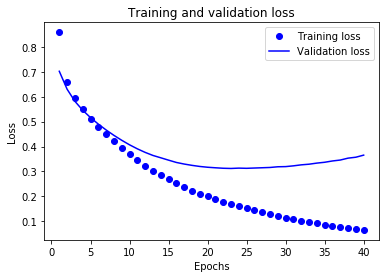

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

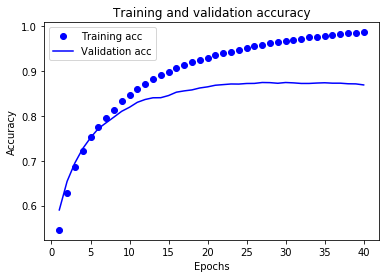

In [14]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()